# **Business Case: Netflix - Data Exploration & Visualisation**  :

***Business Problem*** : Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing different libaries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings #to ignore the warnings & make our code more representable
warnings.filterwarnings("ignore")

In [ ]:
#Loading of dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



*   "Title" , "director" & "cast" columns needs to be unnested to make our analyis more accurate.
*   Duration columns having data in minutes for movies and in seasons for TV shows





***Attributes information:***

*Show_id*: Unique ID for every Movie / Tv Show

*Type:* Identifier - A Movie or TV Show

*Title:* Title of the Movie / Tv Show

*Director*: Director of the Movie

*Cast*: Actors involved in the movie/show

*Country*: Country where the movie/show was produced

*Date_added:* Date it was added on Netflix

*Release_year*: Actual Release year of the movie/show

*Rating*: TV Rating of the movie/show

*Duration*: Total Duration - in minutes or number of seasons

Listed_in *italicized text*: Genre

*Description*: The summary description


In [ ]:
df.shape #checking the count of no. of rows and columns of dataset

(8807, 12)

*Dataset is having 8807 rows of data with 12 attributes.*

In [ ]:
df.info() #to check the data types of all columns and count of values in particular column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB



*   We can see that type of rating and date_added columns is "object" which should be categorical and datetime. 
*   More no. of missing values in cast and director columns.






# ***Statistical summary***

In [ ]:
df.describe()  #to check statistical summary of numerical type data

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000




*   25% of the tolal data belongs to year 2019-2021
*   25% of the tolal data belongs to year 1925-2013

***Insight*** -->Netflix should add latest Movies and TV shows to attract more customers.

In [ ]:
df.describe(include = object) #to check statistical summary of categorical type data

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**Conclusion :-**

*   Show_id and Title are the unique factors.
*   "Type" and "rating" column needs to be changed to categorical data
*   "United States" is having the maximun content available.







# ***Missing value detection***

In [ ]:
df.isnull().sum() #checking count of null values per column.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


*  Lot of missing data in director, cast and country columns as compared to others.




In [ ]:
for col in df:
  null_count = df[col].isnull().sum() / len(df) *100
  print(col , "-->" ,null_count)

show_id --> 0.0
type --> 0.0
title --> 0.0
director --> 29.908027705234474
cast --> 9.367548540933349
country --> 9.435676166685592
date_added --> 0.11354604292040424
release_year --> 0.0
rating --> 0.04541841716816169
duration --> 0.034063812876121265
listed_in --> 0.0
description --> 0.0


As we can we 30% of Director columns value are missing , we cant drop this much data. We will fill these columns with "Unknown" 

In [ ]:
df[["director","cast","country"]] = df[["director","cast","country"]].fillna("Unknown") #Fillling up the missing values

In [ ]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

We will drop these rows in which date added values are missing when we will do the analysis related to date added

In [ ]:
df["rating"].value_counts() #checking unique values in rating columns.

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

As we can clearly see that last three values of rating should be in duration columns. 

***Shifting of data to the right columns***

In [ ]:
df.loc[(df["rating"] == "74 min") | (df["rating"] == "84 min") | (df["rating"] == "66 min")]
df["duration"][[5541,5794,5813]] = df["rating"][[5541,5794,5813]]
df["rating"][[5541,5794,5813]] = "Nan"

In [ ]:
df["rating"].value_counts() #checking the count of each category. 

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Nan            3
UR             3
Name: rating, dtype: int64

In [ ]:
#Conversion of categorical attributes to 'category' and 'datetime'
df["date_added"] = pd.to_datetime(df["date_added"])
df =df.astype({"type" : "category", "rating" : "category"})

# ***Univariate Analysis***

In [ ]:
df_datetime = df.copy()
df_datetime['Year'] = df.date_added.dt.year  #adding new columns to the dataframe --> year , month , weekday
df_datetime['month'] = df.date_added.dt.month
df_datetime['day'] = df.date_added.dt.day_name()

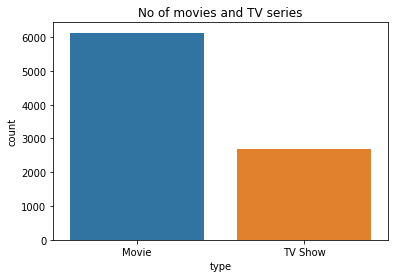

In [ ]:
sns.countplot(x = "type" , data = df_datetime) #countplot to count the no of movies and tv shows available.
plt.title("No of movies and TV series")
plt.show()

Immense difference between the count of no of movies and TV show.

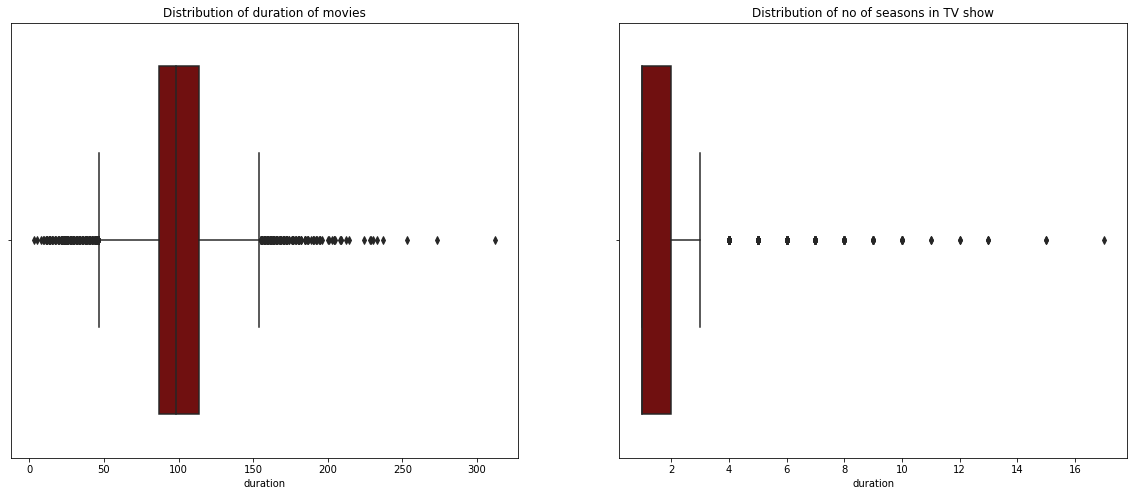

In [ ]:
plt.figure(figsize=(20,8))
duration_df = df.loc[df["duration"].str.contains("min")== True]["duration"].apply(lambda x: x.split()[0]).astype(int)  # splting the movies duration as its type is string , extracting the numeri value and converting it into int type
plt.subplot(1,2,1) #subplots to make the data look easy for comparison.
sns.boxplot(duration_df , color = "maroon")
plt.title("Distribution of duration of movies")
duration_seson_df = df.loc[df["duration"].str.contains("Season")== True]["duration"].apply(lambda x: x.split()[0]).astype(int)
plt.subplot(1,2,2)
sns.boxplot(duration_seson_df , color = "maroon")
plt.title("Distribution of no of seasons in TV show")
plt.show()

**Conclusion** - 
*  Average duration of movies are around 100 min
*  TV shows mostly are having 1 or 2 seasons.
*  There are lot of outliers present in movies as compare to TV shows





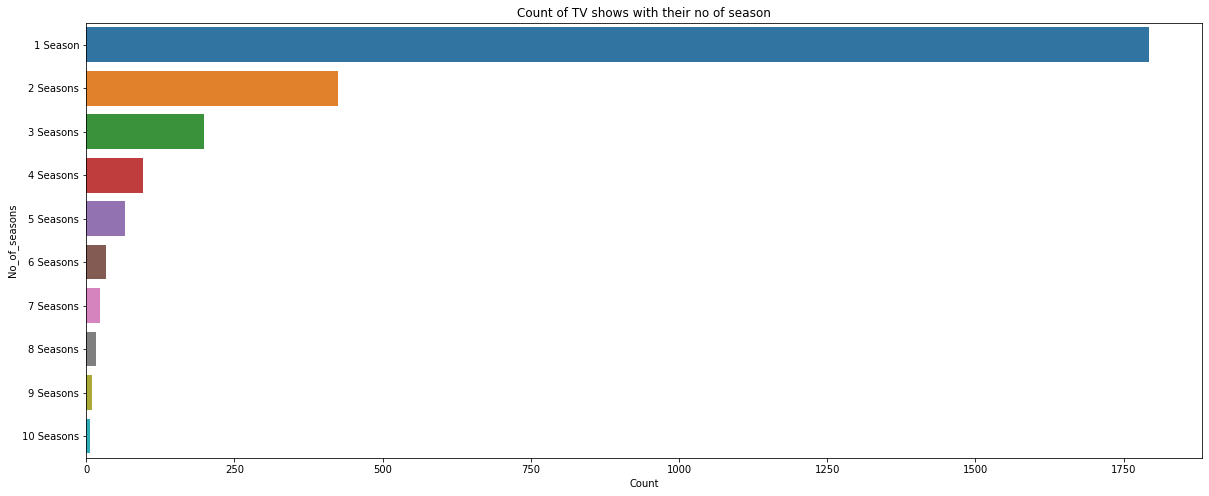

In [ ]:
df_TV_season = df.loc[df["duration"].str.contains("Season")== True , "duration" ].value_counts().reset_index()[:10]  #filtering out top 10 values of TV shows using string. 
df_TV_season.rename(columns = {"index" : "No_of_seasons" , "duration" : "Count"}, inplace = True) #renaming the columns 
plt.figure(figsize=(20,8))
sns.barplot(y = "No_of_seasons" , x = "Count" , data = df_TV_season)
plt.title("Count of TV shows with their no of season")
plt.show()

Mostly TV shows have only one season. 

# ***Bivariate Analysis***

In [ ]:
df_datetime = pd.DataFrame(df)
df_datetime['Year'] = df.date_added.dt.year
df_datetime['month'] = df.date_added.dt.month 
df_datetime['day'] = df.date_added.dt.day_name()
df_datetime_month = df_datetime.sort_values(by ="month")
df_datetime_month['month_name'] = df.date_added.dt.month_name()

**Analysis of number of content added on Netflix over the period**

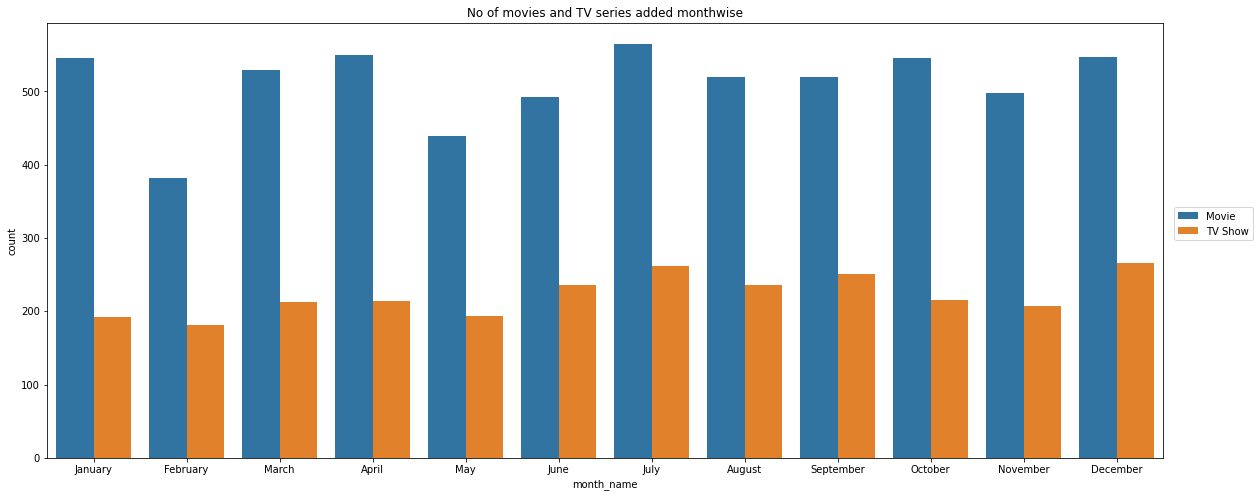

In [ ]:
plt.figure(figsize=(20,8)) #defining fig size fot the graph image
sns.countplot(x = "month_name" , data = df_datetime_month , hue = "type")
plt.title("No of movies and TV series added monthwise") #title name of the plot
plt.legend(loc=(1.01,0.5))
plt.show()

***Conclusion :-***
*  July and December are the months when most content was added becasue no of TV shows durind these two months are maximum among all.
*  No of movies added per month is greater then no of TV shows added per month.



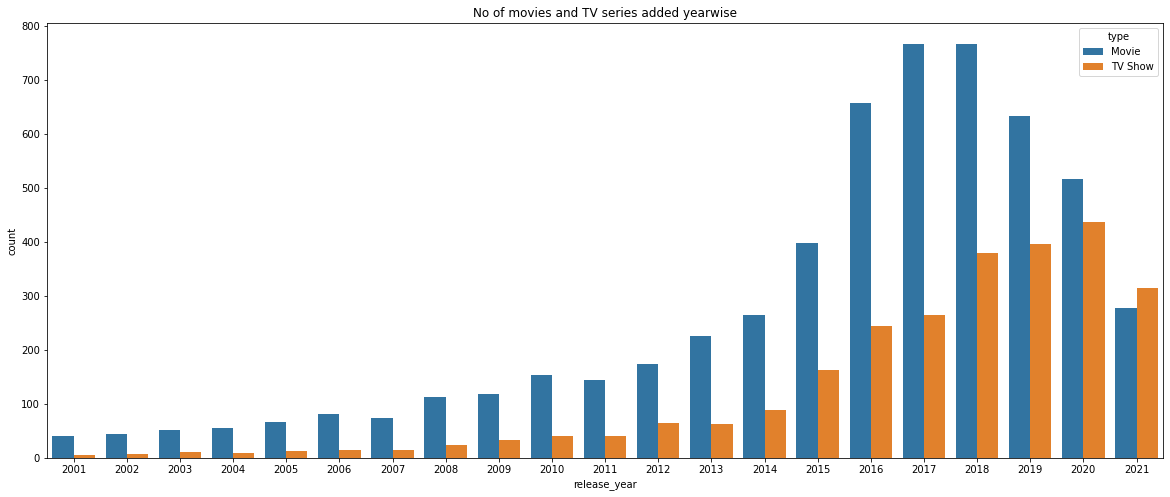

In [ ]:
plt.figure(figsize=(20,8))
df_year = df.loc[df['release_year']>2000] #used masked to get out data for movies and TV shows released after 2000
sns.countplot(x='release_year', data = df_year, hue='type')
plt.title("No of movies and TV series added yearwise")
plt.show()

***Conclusion :-***


*   In 2020 , maximum no. of TV shows are added followed by 2019 & 2021.
*   More no of movies added on Netflix after "2015"
*   We can see in 2021 count of movies add drop significanty  ,maybe due to COVID pandemic.





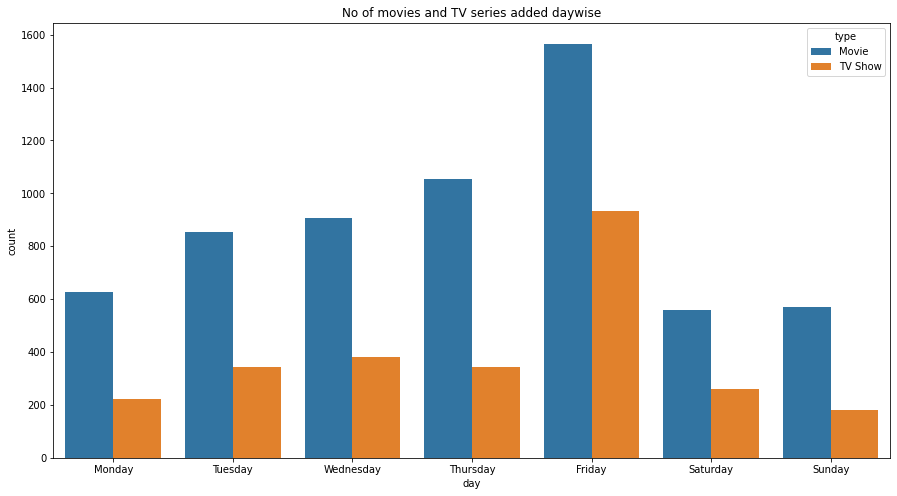

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = "day" , data = df_datetime , hue = "type" ,  order=["Monday" , "Tuesday" , "Wednesday", "Thursday", "Friday", "Saturday" ,"Sunday"])
plt.title("No of movies and TV series added daywise")
plt.show()

***Conclusion :-***  Most of the content added on netflix on "Friday" followed by Thursday as weekend appraches after these days.





PG-13 -----> Parental Guidance with Adult Themes[Parental Guidance]
TV-MA -----> Mature Audience[Only for Adults]
PG -----> Parental Guidance without Adult Themes[Parental Guidance]
TV-14 -----> Contents with Parents strongly cautioned.
TV-PG -----> Parental guide suggested[Parental Guidance]
TV-Y -----> Children suited content[General Audience & Kids]
TV-Y7 -----> Children of age 7 and older[General Audience & Kids]
R -----> Strictly for Adults[Only for Adults]
TV-G -----> Suitable for all audiences[General Audience & Kids]
G -----> General Audience films[General Audience & Kids]
NC-17 -----> No one seventeen and under admitted[Only for Adults]
NR -----> Not rated movies[Not Rated]
TV-Y7-FV -----> Children of age 7 and older with fantasy violence[General Audience & Kids]
UR -----> recut version of rated movie[Not Rated]


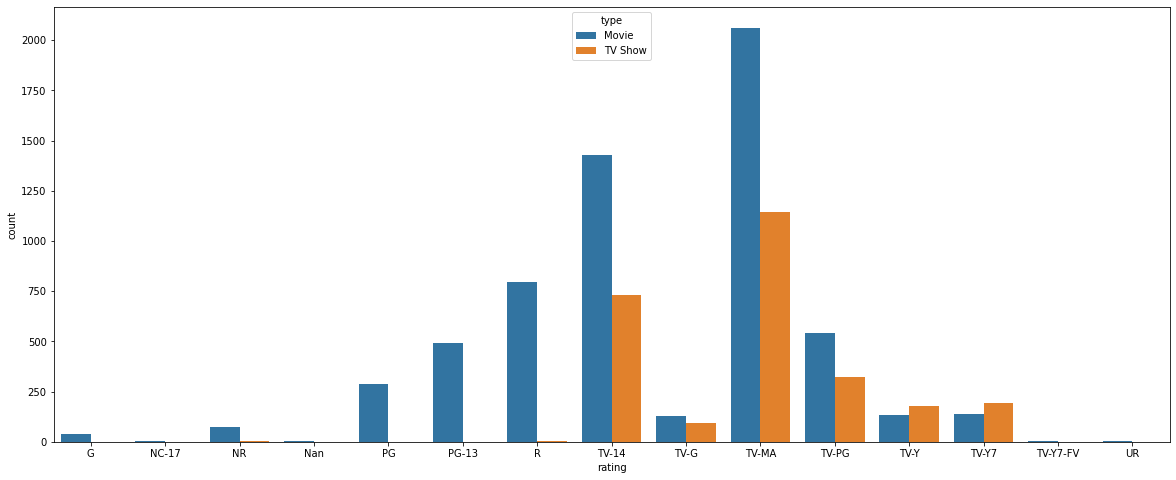

In [ ]:
print('PG-13 -----> Parental Guidance with Adult Themes[Parental Guidance]',
'TV-MA -----> Mature Audience[Only for Adults]',
'PG -----> Parental Guidance without Adult Themes[Parental Guidance]',
'TV-14 -----> Contents with Parents strongly cautioned.',
'TV-PG -----> Parental guide suggested[Parental Guidance]',
'TV-Y -----> Children suited content[General Audience & Kids]',
'TV-Y7 -----> Children of age 7 and older[General Audience & Kids]',
'R -----> Strictly for Adults[Only for Adults]',
'TV-G -----> Suitable for all audiences[General Audience & Kids]',
'G -----> General Audience films[General Audience & Kids]',
'NC-17 -----> No one seventeen and under admitted[Only for Adults]',
'NR -----> Not rated movies[Not Rated]',
'TV-Y7-FV -----> Children of age 7 and older with fantasy violence[General Audience & Kids]',
'UR -----> recut version of rated movie[Not Rated]', sep = '\n')

df_rating = df[df["rating"].isnull()== False]
df_rating.reset_index(inplace = True)
plt.figure(figsize=(20,8))
sns.countplot(x ="rating" , data = df_rating , hue = "type")
plt.show()

# Conclusion :-
*  Mostly TV shows and movies are belongs to TV-MA & TV-14 rating.  
*  Mostly content available on netflix is for adults and teenagers.



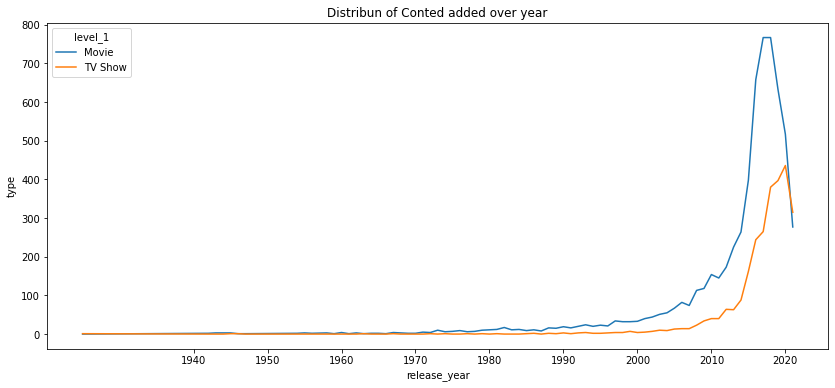

In [ ]:
df_yearwise_trend = pd.DataFrame(df.groupby("release_year")["type"].value_counts())  #grouping of the content by year forr movies and TV shows
df_yearwise_trend.reset_index(inplace = True)
df_content_count =df_yearwise_trend.pivot(index = "release_year",
                        columns = "level_1",
                        values ="type")
df_content_count.reset_index(inplace = True)
plt.figure(figsize=(14,6))
sns.lineplot(x = "release_year" , y = "type" , data = df_yearwise_trend , hue = "level_1")
plt.xticks(np.arange(1940,2025,10))
plt.title("Distribun of Conted added over year")
plt.show()

# **Conclusion :-**



*   In 2020 , maximum no. of TV shows are added followed by 2019 & 2021.
*   More no of movies added on Netflix after "2015"
*   We can see in 2021 count of movies add drop significanty ,maybe due to COVID pandemic.










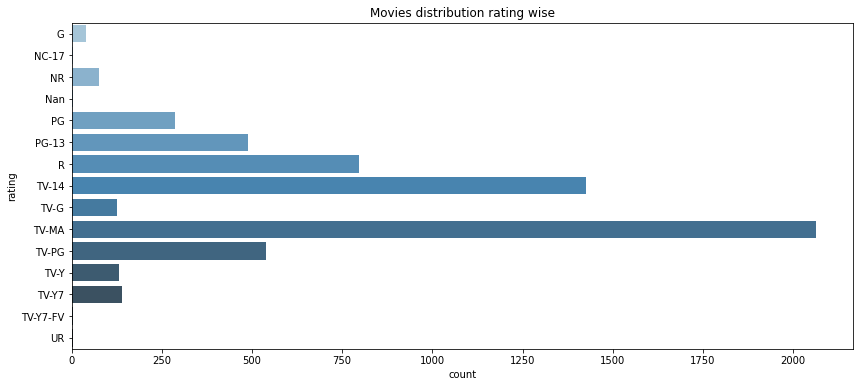

In [ ]:
plt.figure(figsize=(14,6))
movies_ratingwise = df.loc[df["type"] == "Movie" , ["type" , "rating"]]
sns.countplot( y="rating" , data =movies_ratingwise,  palette="Blues_d" )
plt.title("Movies distribution rating wise")
plt.show()

**Conclusion** : Mostly movies are belongs to TV-MA & TV-14 rating.

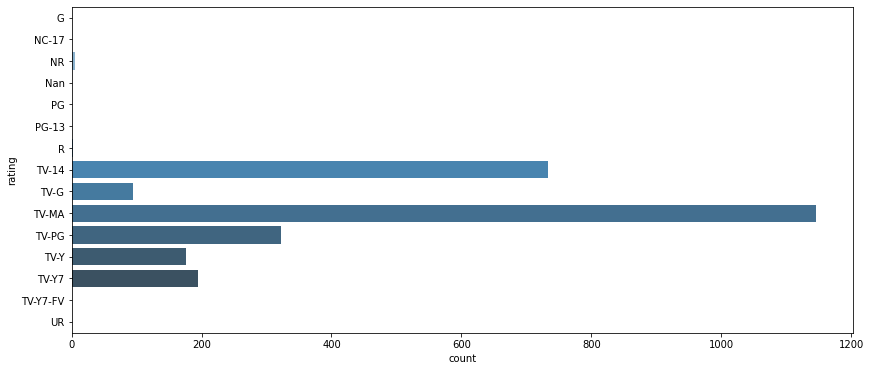

In [ ]:
plt.figure(figsize=(14,6))
movies_ratingwise = df.loc[df["type"] == "TV Show" , ["type" , "rating"]]
sns.countplot( y="rating" , data =movies_ratingwise,  palette="Blues_d" )
plt.title("TV Shows distribution rating wise")
plt.show()

**Conclusion** :- Mostly TV Shows are belongs to TV-MA & TV-14 rating.

In [ ]:
director = df["director"].apply(lambda x : str(x).split(", ")).tolist()  #exploding the nested data in directors column.
df_director = pd.DataFrame(director, index = df["title"])
df_director= df_director.stack()
df_director = df_director.reset_index()
df_director.drop(columns ="level_1" , inplace = True) #droping the columns 
df_director.columns = ["title" , "director"] #renaming the columns
df_fav_director = df.merge(df_director , on = "title" ) #merging of the dataframes
df_fav_director.head(4)

,show_id,type,title,director_x,cast,country,date_added,release_year,rating,duration,listed_in,description,Year,month,day,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,Kirsten Johnson
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Unknown
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday,Unknown


In [ ]:
#exploding country column
country = df["country"].apply(lambda x: str(x).split(", ")).tolist() #exploding the country column
df_country = pd.DataFrame(country, index = df["title"])
df_country = df_country.stack()
df_country = df_country.reset_index()
df_country.drop(columns = "level_1" , inplace = True)
df_country.columns = ["title" , "country"]

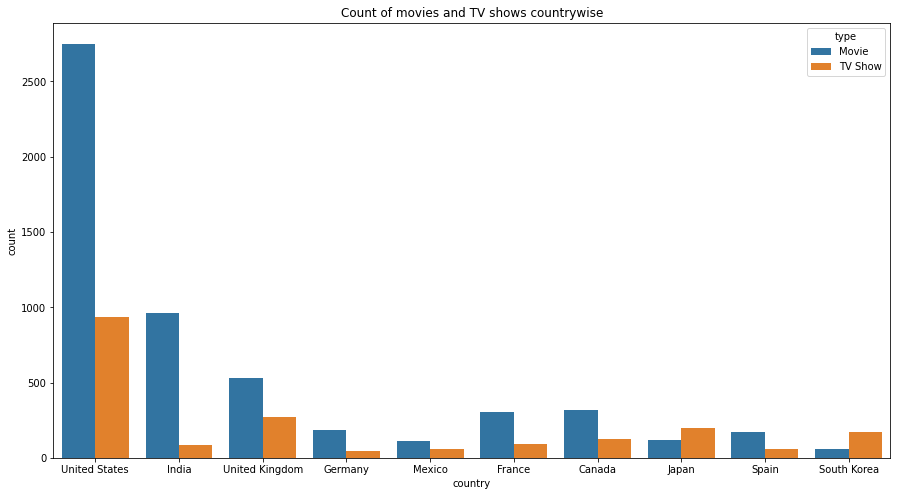

In [ ]:
Country_wise_trend = df.merge(df_country , on = "title") #making new dataframe by merfing df_country and original dataframe.
Country_wise_trend.drop(columns = "country_x" , inplace = True)
Country_wise_trend.rename(columns = {"country_y" : "country"}, inplace = True)
Country_wise_trend = Country_wise_trend.loc[Country_wise_trend["country"] != "Unknown"]
top10_country = Country_wise_trend["country"].value_counts().head(10).reset_index()
top10_country.rename(columns = {"index" :"country" , "country" : "count"}, inplace = True)
Country_wise_trend = Country_wise_trend.merge(top10_country, how = "inner" , on = "country")
plt.figure(figsize = (15,8))
sns.countplot(x ="country" , data =Country_wise_trend , hue = "type" )
plt.title("Count of movies and TV shows countrywise")
plt.show()

# **Conclusion :-** 


*   Netflix should target to add more movies in Unites states and India as compare to TV Series. 
*   Netflix should target to add more TV shows in Japan and South Korea. 





In [ ]:
#exploding listed_in column
listed_in = df["listed_in"].apply(lambda x: str(x).split(", ")).tolist()
df_genre = pd.DataFrame(listed_in, index = df["title"])
df_genre = df_genre.stack()
df_genre = df_genre.reset_index()
df_genre.drop(columns = "level_1" , inplace = True)
df_genre.columns = ["title" , "genre"]
df_genre.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


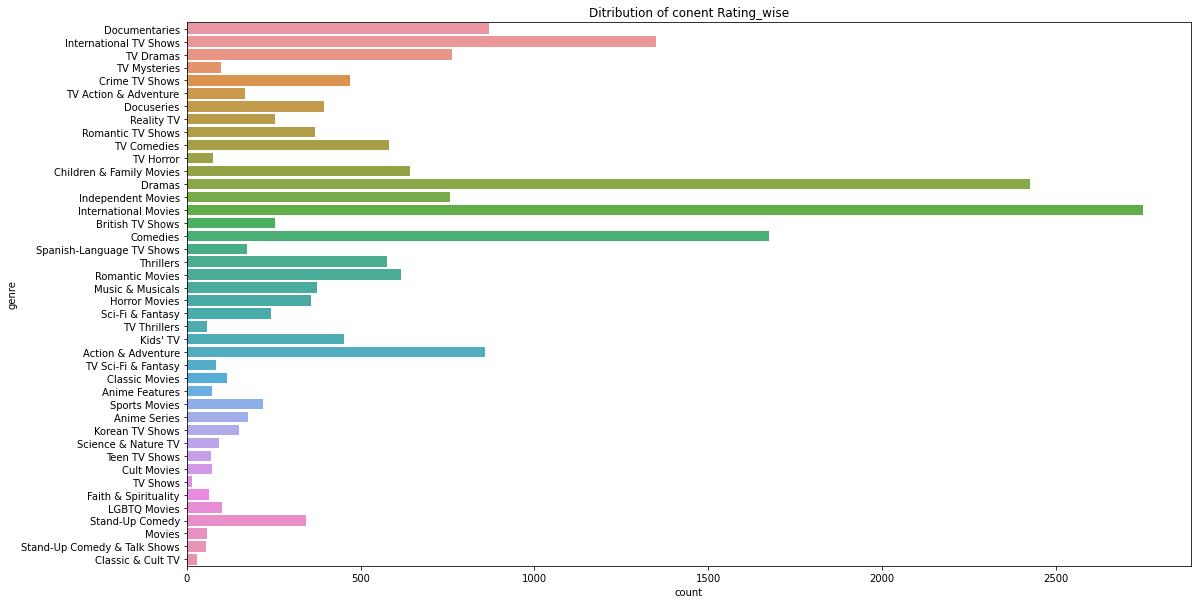

In [ ]:
plt.figure(figsize = (18,10))
sns.countplot(y = "genre" , data =df_genre )
plt.title("Ditribution of conent Rating_wise")
plt.show()

Most appearing category in netflix movies and TV shows are:-
*   International Movies
*   Dramas
*   Comedies
*   International TV show





# ***Non-Graphical Analysis***

In [ ]:
director_countrywise= df_fav_director.merge(df_country , on = "title")
director_countrywise= director_countrywise.drop(columns = ["director_x" , "country_x" ])
director_countrywise.rename(columns = {"director_y": "director" , "country_y" : "country"}, inplace = True)
director_countrywise = director_countrywise.loc[director_countrywise["director"] != "Unknown"]
director_countrywise.reset_index(inplace= True)
director_countrywise.head()

,index,show_id,type,title,cast,date_added,release_year,rating,duration,listed_in,description,Year,month,day,director,country
0,0,s1,Movie,Dick Johnson Is Dead,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,Kirsten Johnson,United States
1,2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,Julien Leclercq,Unknown
2,5,s6,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,9.0,Friday,Mike Flanagan,Unknown
3,6,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,Friday,Robert Cullen,Unknown
4,7,s7,Movie,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,Friday,José Luis Ucha,Unknown


In [ ]:
country = director_countrywise['country'].value_counts()[:6].index.tolist()
print(' Top 2 Directors of Top 5 Countries')
print('\n')
for val in country:
  if val != 'Unknown':
    print(f'**{val}**')
    print(director_countrywise.loc[director_countrywise['country']==val, 'director'].value_counts()[:2])
    print('\n')

 Top 2 Directors of Top 5 Countries


**United States**
Jay Karas       15
Marcus Raboy    15
Name: director, dtype: int64


**India**
Anurag Kashyap    9
David Dhawan      9
Name: director, dtype: int64


**United Kingdom**
Alastair Fothergill    4
Edward Cotterill       4
Name: director, dtype: int64


**Canada**
Justin G. Dyck      8
Mike Clattenburg    5
Name: director, dtype: int64


**France**
Thierry Donard     5
Youssef Chahine    4
Name: director, dtype: int64




Conclusion :
*   Anurag Kashyap and David Dhawan are the most famous directors for Inida. 
*  Jay Karas and Marcus Raboyare the most famous directors in United States.



In [ ]:
director_countrywise["director"].value_counts().head(3)

Rajiv Chilaka    22
Jan Suter        21
Raúl Campos      19
Name: director, dtype: int64

Conclusion : "Rajiv Chilaka" is the most famous director among all followed by Jan Suter

In [ ]:
#exploding cast column
cast = df["cast"].apply(lambda x : str(x).split(", ")).tolist()
df_cast = pd.DataFrame(cast,  index = df["title"])
df_cast = df_cast.stack()
df_cast = df_cast.reset_index()
df_cast.drop(columns = "level_1" , inplace = True)
df_cast.columns = ["title" , "cast"]
df_fav_cast = df.merge(df_cast , on = "title" )

In [ ]:
cast_countrywise= df_fav_cast.merge(df_country , on = "title")
cast_countrywise= cast_countrywise.drop(columns = ["cast_x" , "country_x"])
cast_countrywise = cast_countrywise.rename(columns = {"cast_y" : "cast" , "country_y" : "country"})
cast_countrywise = cast_countrywise.loc[cast_countrywise["cast"] != "Unknown"].reset_index() #making new dataframe by dropping all rows whose cast is unknown and then resetting the index..00
cast_countrywise.head()

,index,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,Year,month,day,cast,country
0,1,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Ama Qamata,South Africa
1,2,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Khosi Ngema,South Africa
2,3,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Gail Mabalane,South Africa
3,4,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Thabang Molaba,South Africa
4,5,s2,TV Show,Blood & Water,Unknown,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,Dillon Windvogel,South Africa


In [ ]:
country_actor = cast_countrywise['country'].value_counts()[:6].index.tolist()
print(' Top 2 Actors of Top 5 Countries')
print('\n')
for val in country:
  if val != 'Unknown':
    print(f'--{val}--')
    print(cast_countrywise.loc[cast_countrywise['country']==val, 'cast'].value_counts()[:2])
    print('\n')

 Top 2 Actors of Top 5 Countries


--United States--
Tara Strong          22
Samuel L. Jackson    22
Name: cast, dtype: int64


--India--
Anupam Kher       40
Shah Rukh Khan    34
Name: cast, dtype: int64


--United Kingdom--
David Attenborough    17
John Cleese           16
Name: cast, dtype: int64


--Canada--
John Paul Tremblay    14
Robb Wells            14
Name: cast, dtype: int64


--France--
Wille Lindberg    5
Benoît Magimel    5
Name: cast, dtype: int64




**Conclusion :-**

*   These are the top two cast of these countires.
*   Netflix has added more content for India in which cast are- Anupam Kher or Shah Rukh Khan.



In [ ]:
cast_countrywise["cast"].value_counts().head(5) #value_counts of the cast columns to get the most famous actors

Anupam Kher           46
David Attenborough    45
Vincent Tong          42
John Cleese           40
Tara Strong           39
Name: cast, dtype: int64

These are the top five actors and most famous actor belongs to India. 

# ***Heatmap***

In [ ]:
df_trend_country = df.merge(df_country , on = "title")
df_trend_country.drop(columns = "country_x" , inplace = True)
df_trend_country.rename(columns = {"country_y":"country"}, inplace = True)

In [ ]:
temp = df_trend_country['country'].value_counts()[:11].reset_index()
temp.rename(columns = {'index':'country', 'country':'count'}, inplace=True)
country_list = temp['country'].tolist()
df_top10country = df_trend_country.loc[df_trend_country['country'].isin(country_list)]
df_top10country = df_top10country.loc[df_top10country["country"]!="Unknown"] #dropping of rows whose value is unknown.

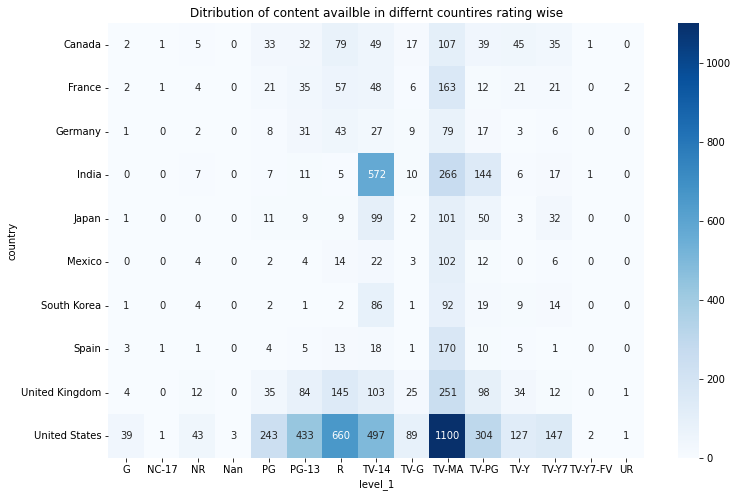

In [ ]:
heat_rating = df_top10country.groupby("country")["rating"].value_counts().reset_index()
heat_rating = heat_rating.pivot("country" , "level_1" , "rating")
plt.figure(figsize = (12,8))
sns.heatmap(heat_rating, annot = True,  cmap="Blues", fmt = "d")
plt.title("Ditribution of content availble in differnt countires rating wise")
plt.show()


**Conclusion :-**

* Top 10 countries are having most content that belongs to TV-MA (Adults 
Category)
* India and United States are having large content in TV-14 category. 
* United Kingdom and United States are having large content in R category. 

In [ ]:
genre_country_df= df_trend_country.merge(df_genre , on= "title")
genre_country_df.head(5)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,Year,month,day,country,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,United States,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,South Africa,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,Unknown,Crime TV Shows


In [ ]:
temp_genre = genre_country_df['genre'].value_counts()[:10].reset_index()
temp_genre.rename(columns = {'index':'genre', 'genre':'count'}, inplace=True)
genre_list = temp_genre['genre'].tolist()
df_top10_genre = genre_country_df.loc[genre_country_df['genre'].isin(genre_list)]
df_top10_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,Year,month,day,country,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,United States,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,South Africa,TV Dramas
5,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,Unknown,International TV Shows
9,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday,India,International TV Shows


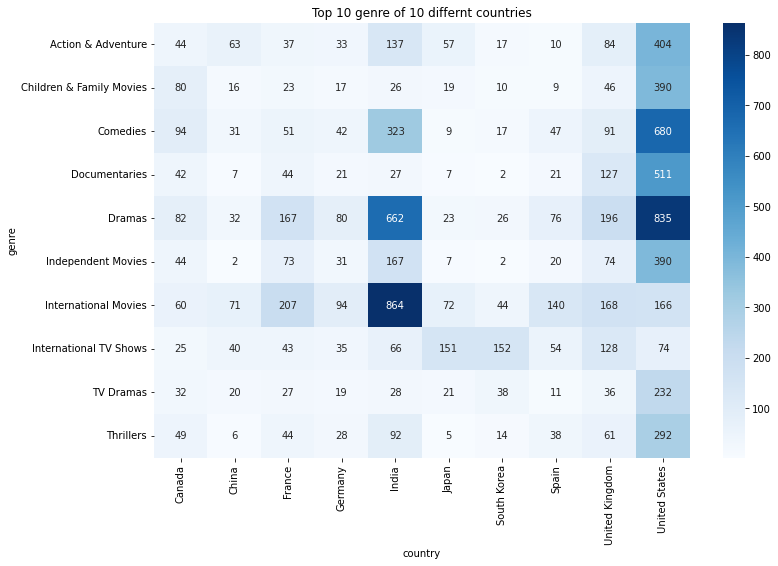

In [ ]:
df_top10_genre = df_top10_genre.loc[df_top10_genre["country"] != "Unknown"]
df_top10_genre["country"].value_counts()[:10]

temp_c = df_top10_genre["country"].value_counts()[:10].reset_index()
temp_c.rename(columns = {'index':'country', 'country':'count'}, inplace=True)
country_list = temp_c["country"].tolist()
df_top10_genre_countrywise = df_top10_genre.loc[df_top10_genre['country'].isin(country_list)]
df_top10_genre_countrywise.head()

heat_genre= pd.DataFrame(df_top10_genre_countrywise.groupby("genre")["country"].value_counts())
heat_genre.rename(columns = {"country" : "count"}, inplace = True)
heat_genre.reset_index(inplace = True)
heat_genre_final = heat_genre.pivot("genre" , "country" , "count")
plt.figure(figsize = (12,8))
sns.heatmap(heat_genre_final , annot = True,  cmap="Blues", fmt = "d")
plt.title("Top 10 genre of 10 differnt countries")
plt.show()

**Conclusion** :-
*  For India, netflix should add more content of genre International movies , Comedies and Dramas.
* For United States , Netflix should add more content of genre Dramas and Comedy.
* For Canada, Netflix should add more content of genre Dramas & Children and family movies.


# **Summary :-**


*   Netflix added more movies as compare to TV shows
*   Content for United States on netflix is maximum as compare to other countries. 
*   Netflix content is mostly availabe for adults only 
*   Most popular genres in recent years are International movies, Dramas, Comedies, International TV Shows and Action & Adventure.
* In 2021 , there is significant amount of drop in content added due to COVID pandemic.
*Most of viewers of Netflix is from United States followed by India & United Kingdom

**Movies:-**
* In United States , India and United kingdom movies are more popular as comapre to other countires 
* Almost same no. of movies are added on netflix every month.
* Mostly movies are of "100 min" duration.
* Top people casted in Movies are from India.
* "Rajiv Chilakaa" is the most famous director among all. 

**TV Shows :-**
* TV Shows mostly are having season 1 and season 2 respectively. 
* For Japan and South Korea, netflix should focus more on TV showes as compare to movies 


**Recommendations** : 

*Movies* :- 
* Preferd movies duration is between 90-100 minutes. 
* Netflix should add more movies for United States and India falling in category of Internation movies and comedies
* Netflix should add more movies for United States and India having rating of TV-MA & TV-14. 
* Top three countries where movies added are United States, India & United Kingdom.
*  Netflix shoud add TV Show on Friday than any other weekday.

*TV Show*:- 
* Preferd movies duration is 1-2 seeasons.
* Netflix should focus on countries like Japan, South Korea and France in TV shows , as they prefer TV shows over movies. 
* Netflix shoud add TV Show on Friday than other weekday.
* As per 2021 data, count of TV showes are more than movies , this means people wants more web-series as they have for leisure time may be due to work from home scenario. 
